# Sonar Classification (Rocks vs Mines)

## Introduction

Sonar, also known as sound navigation and ranging, uses the process of reflecting waves off of an object or the floor of the ocean (Sonar Data — Mines vs Rocks — on CAInvas, 2020). It is often used to map out object placement, as a form of communication, as well as navigation (Sonar Data — Mines vs Rocks — on CAInvas, 2020). Sonar waves can either be passive and listened to naturally through vessels, or active with active monitoring of echoes created by pulses in the ocean (Sonar Data — Mines vs Rocks — on CAInvas, 2020). The implications of sonar research are far and wide as they can ensure the safety of those that travel by water, as well as help many learn more about objects that may have sunk deep and have limited accessibility (Sonar Data — Mines vs Rocks — on CAInvas, 2020). 
 
When sonar signals are bounced off an object in the ocean, frequency modulated chirps are transmitted (Sejnowski & Gorman, n.d.). These signals can be at varying angles, in varying conditions, and can be bounced off of objects that are composed of different materials (Sonar Data — Mines vs Rocks — on CAInvas, 2020). Calculating and obtaining signals from different angles allows us to make holistic assumptions about different objects in the ocean, as well as their nature. 
 
The rocks vs. mines dataset used in this report, consists of 60 attributes. These attributes range from 0 to 1, with each of them representing energy for a given frequency of sonar signals being bounced off of either a mine (metal cylinder) or rock. The angles the signals are transmitted off of can range from 90 degrees (for a mine) to 180 degrees (for a rock). The collection of 60 attributes further demonstrates the integration of energy over a period of time. Each pattern and collection of frequencies are assigned a letter in the classification column, either “M” or “R”, depending on what the object is classified as based on its characteristics. The dataset consists of 111 mines and 97 rocks, totalling to 208 observations – all of which are numerical with the exception of the classification column. 
 
The goal is to determine whether a given random label can be accurately classified as a mine or a rock. Through the use of a training set extracted from this dataset, we were able to create a KNN classification model and test our testing set to determine our accuracy. We then ran our unknown label through our model and created visualizations to understand our label better. 

## Methods and Results

In [1]:
# First, we need to install all necessary R packages 

install.packages("kknn")
install.packages("cowplot")
install.packages("ggcorrplot")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
# Now we need to load all of the necessary libraries

library(ggcorrplot)
library(cowplot)
library(kknn)
library(tidyverse)
library(tidymodels)
library(repr)
library(dplyr)

Loading required package: ggplot2

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
✔ purrr   1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstic

### Loading Data From the Web

In [3]:
# Then, we need to read the data from a URL using appropriate read_* and assign it to a variable
# The dataset was downloaded from: "https://www.kaggle.com/datasets/armanakbari/connectionist-bench-sonar-mines-vs-rocks"

sonar_url <- "https://raw.githubusercontent.com/DannyPirouz/DSCI_100_Project/main/sonar.all-data.csv"
sonar_data <- read_csv(sonar_url)

Rows: 208 Columns: 61
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Label
dbl (60): Freq_1, Freq_2, Freq_3, Freq_4, Freq_5, Freq_6, Freq_7, Freq_8, Fr...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Wrangle and Cleaning Data

In [4]:
# Check to see if we have missing data

sum(is.na(sonar_data))

[1] 0

In [5]:
# Next, we need to convert the column "Label" to a factor type and change the name of the labels to improve readability

sonar_data <- sonar_data |>
              mutate(Label = as.factor(Label)) |>
              mutate(Label = fct_recode(Label, "Rock" = "R", "Mine" = "M"))
head(sonar_data, 5)
# Our data is now wrangled and clean

Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,⋯,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,⋯,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,⋯,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,⋯,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,⋯,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,⋯,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock


### Summary of Dataset

In [6]:
# Now, we want to see how many "Rocks" and "Mines" we have in our entire data set

count_table <- sonar_data |> 
               group_by(Label) |>
               summarize(Count = n()) |>
               mutate(Percentage = 100*Count/nrow(sonar_data))
count_table
# It is good that the percentages are close to 50%

Label,Count,Percentage
<fct>,<int>,<dbl>
Mine,111,53.36538
Rock,97,46.63462


Table 1. Mine to Rock Proportion in Dataset

In [7]:
# We need to split the data into the training portion and the testing portion 
# The initial_split function will create randomness for us 
set.seed(1)

sonar_split <- initial_split(sonar_data, prop = 0.75, strata = Label)
sonar_train <- training(sonar_split)
sonar_test <- testing(sonar_split)

head(sonar_train, 5)

Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,⋯,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.0491,0.0279,0.0592,0.1270,0.1772,0.1908,0.2217,0.0768,0.1246,0.2028,⋯,0.0081,0.0129,0.0161,0.0063,0.0119,0.0194,0.0140,0.0332,0.0439,Mine
0.1313,0.2339,0.3059,0.4264,0.4010,0.1791,0.1853,0.0055,0.1929,0.2231,⋯,0.0362,0.0210,0.0154,0.0180,0.0013,0.0106,0.0127,0.0178,0.0231,Mine
0.0587,0.1210,0.1268,0.1498,0.1436,0.0561,0.0832,0.0672,0.1372,0.2352,⋯,0.0331,0.0111,0.0088,0.0158,0.0122,0.0038,0.0101,0.0228,0.0124,Mine
0.0162,0.0253,0.0262,0.0386,0.0645,0.0472,0.1056,0.1388,0.0598,0.1334,⋯,0.0071,0.0082,0.0232,0.0198,0.0074,0.0035,0.0100,0.0048,0.0019,Mine
0.0428,0.0555,0.0708,0.0618,0.1215,0.1524,0.1543,0.0391,0.0610,0.0113,⋯,0.0142,0.0179,0.0079,0.0060,0.0131,0.0089,0.0084,0.0113,0.0049,Mine


In [8]:
# We have created a table to see how many "Rocks" and "Mines" we have in our training data

label_proportions_table <- sonar_train |>
                           group_by(Label) |> 
                           summarize(Count = n()) |>
                           mutate(Percentage = 100*Count/nrow(sonar_train))

label_proportions_table

# We notice that our "Label" proportions were preserved when we split the data 

Label,Count,Percentage
<fct>,<int>,<dbl>
Mine,83,53.54839
Rock,72,46.45161


Table 2. Rock to Mine Proportion in Training Data

In [9]:
# Finding the mean of every frequency

freq_means_per_column <- sonar_train |>
              select(Freq_1:Freq_60) |>
              map_df(mean)

freq_means_per_column <- pivot_longer(freq_means_per_column, cols = Freq_1:Freq_60, names_to = "Frequency_Number", values_to = "Mean_Frequency_Value")
head(freq_means_per_column, 5)

Frequency_Number,Mean_Frequency_Value
<chr>,<dbl>
Freq_1,0.02929355
Freq_2,0.03812516
Freq_3,0.04391935
Freq_4,0.05357097
Freq_5,0.07398516


Table 3. Mean of Frequencies

In [10]:
# Finding the mean of every frequency grouped by "Label"

freq_means_grouped_by_label <- sonar_train |>
                               group_by(Label) |>
                               summarize(across(Freq_1:Freq_60, ~ mean(.x, na.rm = TRUE)))
 
freq_means_grouped_by_label <- pivot_longer(freq_means_grouped_by_label, cols = Freq_1:Freq_60, names_to = "Frequency Number", values_to = "Mean Frequency Value")
head(freq_means_grouped_by_label, 3)
tail(freq_means_grouped_by_label, 3)

Label,Frequency Number,Mean Frequency Value
<fct>,<chr>,<dbl>
Mine,Freq_1,0.03610361
Mine,Freq_2,0.04571928
Mine,Freq_3,0.05000120


Label,Frequency Number,Mean Frequency Value
<fct>,<chr>,<dbl>
Rock,Freq_58,0.006444444
Rock,Freq_59,0.006895833
Rock,Freq_60,0.006086111


Table 4. Mean of Frequencies Grouped by Label

In [11]:
# Finding the maximum of every frequency

freq_max_per_column <- sonar_train |>
            select(Freq_1:Freq_60) |>
            map_df(max)

freq_max_per_column <- pivot_longer(freq_max_per_column, cols = Freq_1:Freq_60, names_to = "Frequency Number", values_to = " Maximum Frequency Value")
head(freq_max_per_column, 5)

Frequency Number,Maximum Frequency Value
<chr>,<dbl>
Freq_1,0.1371
Freq_2,0.2339
Freq_3,0.3059
Freq_4,0.4264
Freq_5,0.4010


Table 5. Maximum of Frequencies

In [12]:
# Finding the minimum of every frequency

freq_min_per_column <- sonar_train |>
            select(Freq_1:Freq_60) |>
            map_df(min)

freq_min_per_column <- pivot_longer(freq_min_per_column, cols = Freq_1:Freq_60, names_to = "Frequency Number", values_to = " Minimum Frequency Value")
head(freq_min_per_column, 5)

Frequency Number,Minimum Frequency Value
<chr>,<dbl>
Freq_1,0.0015
Freq_2,0.0006
Freq_3,0.0015
Freq_4,0.0058
Freq_5,0.0067


Table 6. Minimum of Frequencies

### Visualizations of the Dataset

In [13]:
# Plotting a histogram of various frequencies to see what their distributions look like

# The data never mentioned what the units for the energy represented by each frequency so we were not able to include those units

hist_18 <- ggplot(sonar_train, aes(x = Freq_18, fill = Label)) + 
          geom_histogram(position = "identity", binwidth = 0.04) + 
          labs(x = "Frequency 18", y = "Count", fill = "Label") +
          ggtitle("Distribution of Frequency 18 Labeled as Mine or Rock") +
          theme(text = element_text(size = 12)) +
          facet_grid(rows = vars(Label))

In [14]:
hist_12 <- ggplot(sonar_train, aes(x = Freq_12, fill = Label)) + 
          geom_histogram(position = "identity", binwidth = 0.04) + 
          labs(x = "Frequency 12", y = "Count", fill = "Label") +
          ggtitle("Distribution of Frequency 12 Labeled as Mine or Rock") +
          theme(text = element_text(size = 12)) +
          facet_grid(rows = vars(Label))

In [15]:
hist_21 <- ggplot(sonar_train, aes(x = Freq_21, fill = Label)) + 
          geom_histogram(position = "identity", binwidth = 0.04) + 
          labs(x = "Frequency 21", y = "Count", fill = "Label") +
          ggtitle("Distribution of Frequency 21 Labeled as Mine or Rock") +
          theme(text = element_text(size = 12)) +
          facet_grid(rows = vars(Label))

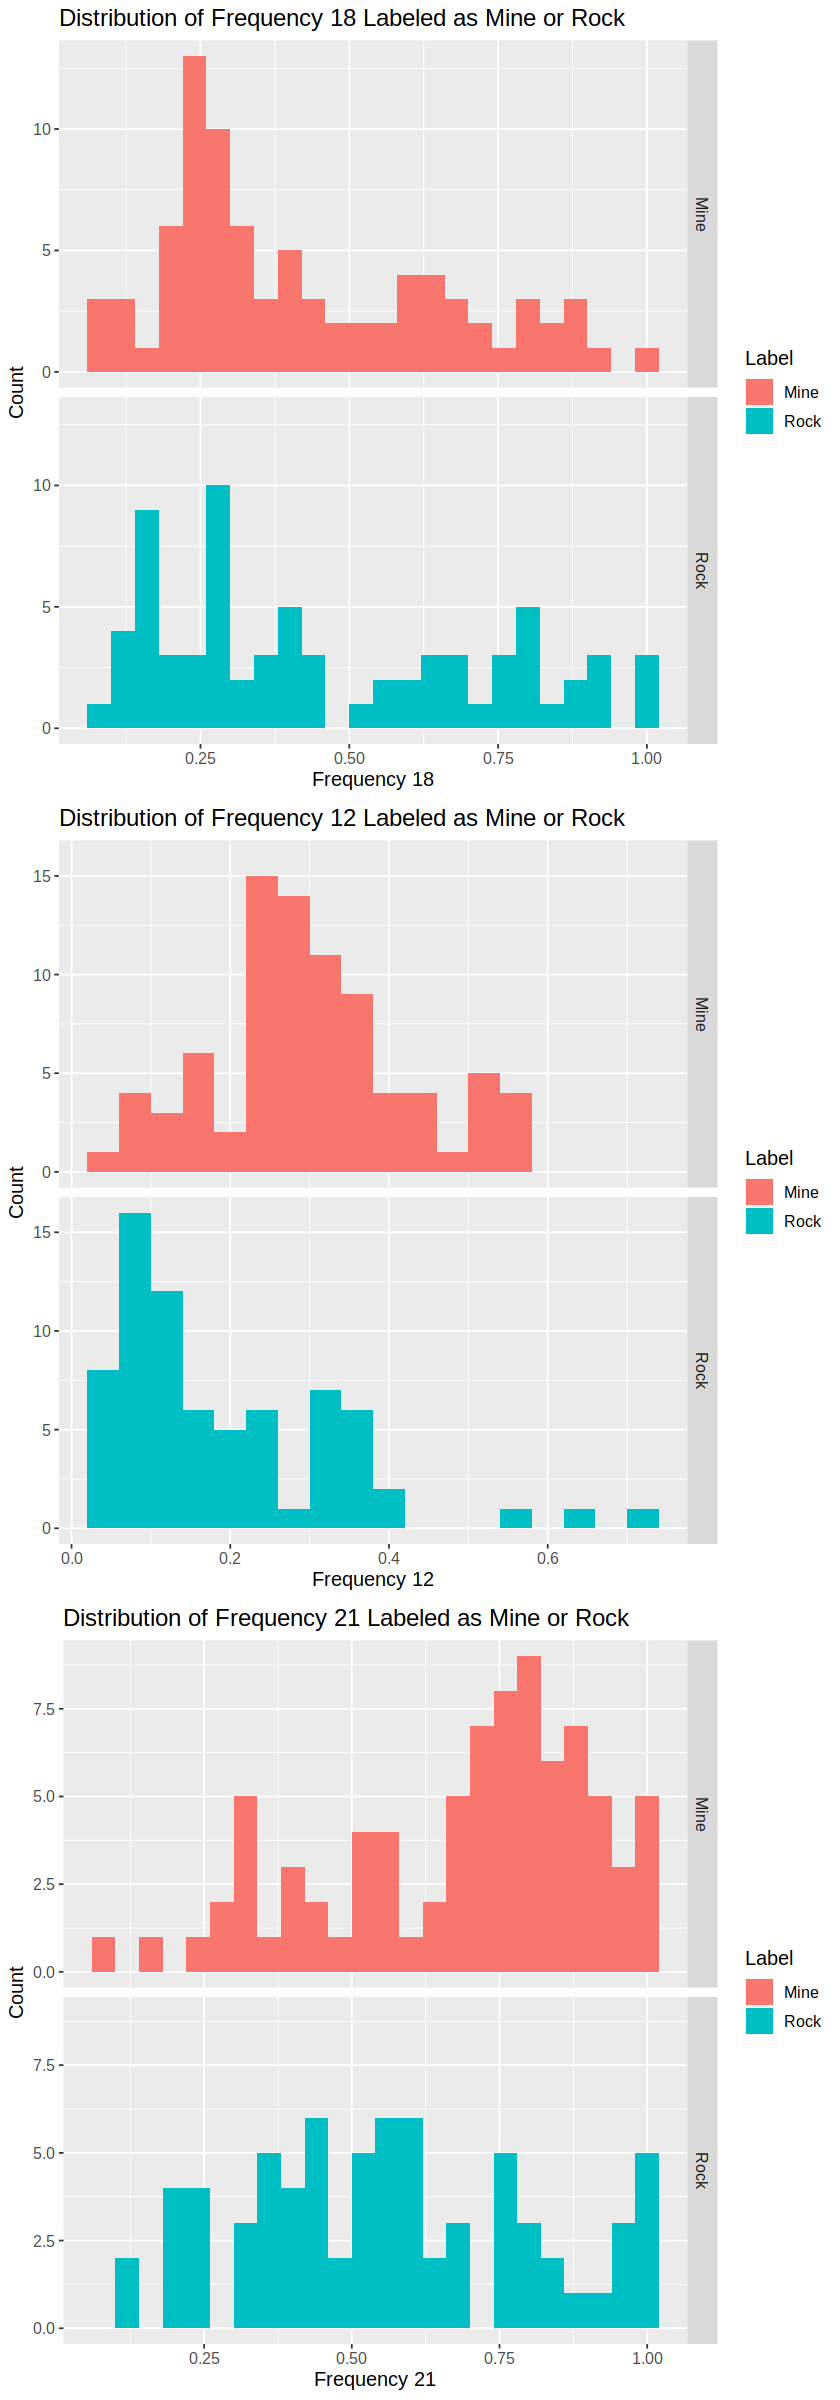

In [16]:
options(repr.plot.width = 7, repr.plot.height = 20)
plot_grid(hist_18, hist_12, hist_21, ncol = 1)

Figure 1. Distributions of Frequencies 18, 12, and 21  

Frequency 18 histograms have very similar distributions as they both have their modes at around 0.025. Since the distributions are very similar, it is very unlikely that this frequency would be a driving force. Frequency 12 histograms have different distributions. The mine distribution resembles a bell-shape with the average around 0.3. The rock distribution is very right-skewed with a mode at around 0.1. Since these distributions are quite different, this suggests that this frequency would be a very big driving factor. Frequency 21 histograms have somewhat different distributions. The mine distribution is left-skewed with the mode at ~ 0.80. The rock distribution is similar to a bell-shape with the mean at ~ 0.60. These distributions are somewhat different so this frequency will be a driving force but not as big as frequency 12 because a lot of mine labels are in the main bell-shape of the rock label.

These histograms will allow us to understand what we should expect with our unknown label once the label is identified. We can use these histograms to see if our expectations line up with the unknown label. 


In [17]:
# Now we are going to create scatter plots with various frequencies to see if we can identify any groupings or patterns
# First, we have to scale our data for the scatter plot
# Then, we can create the scatter plot

set.seed(3)

sonar_train_recipe <- recipe(Label ~ ., data = sonar_train) |>
                      step_scale(all_predictors()) |>
                      step_center(all_predictors()) |>
                      prep()

scaled_sonar_train <- bake(sonar_train_recipe, sonar_train)

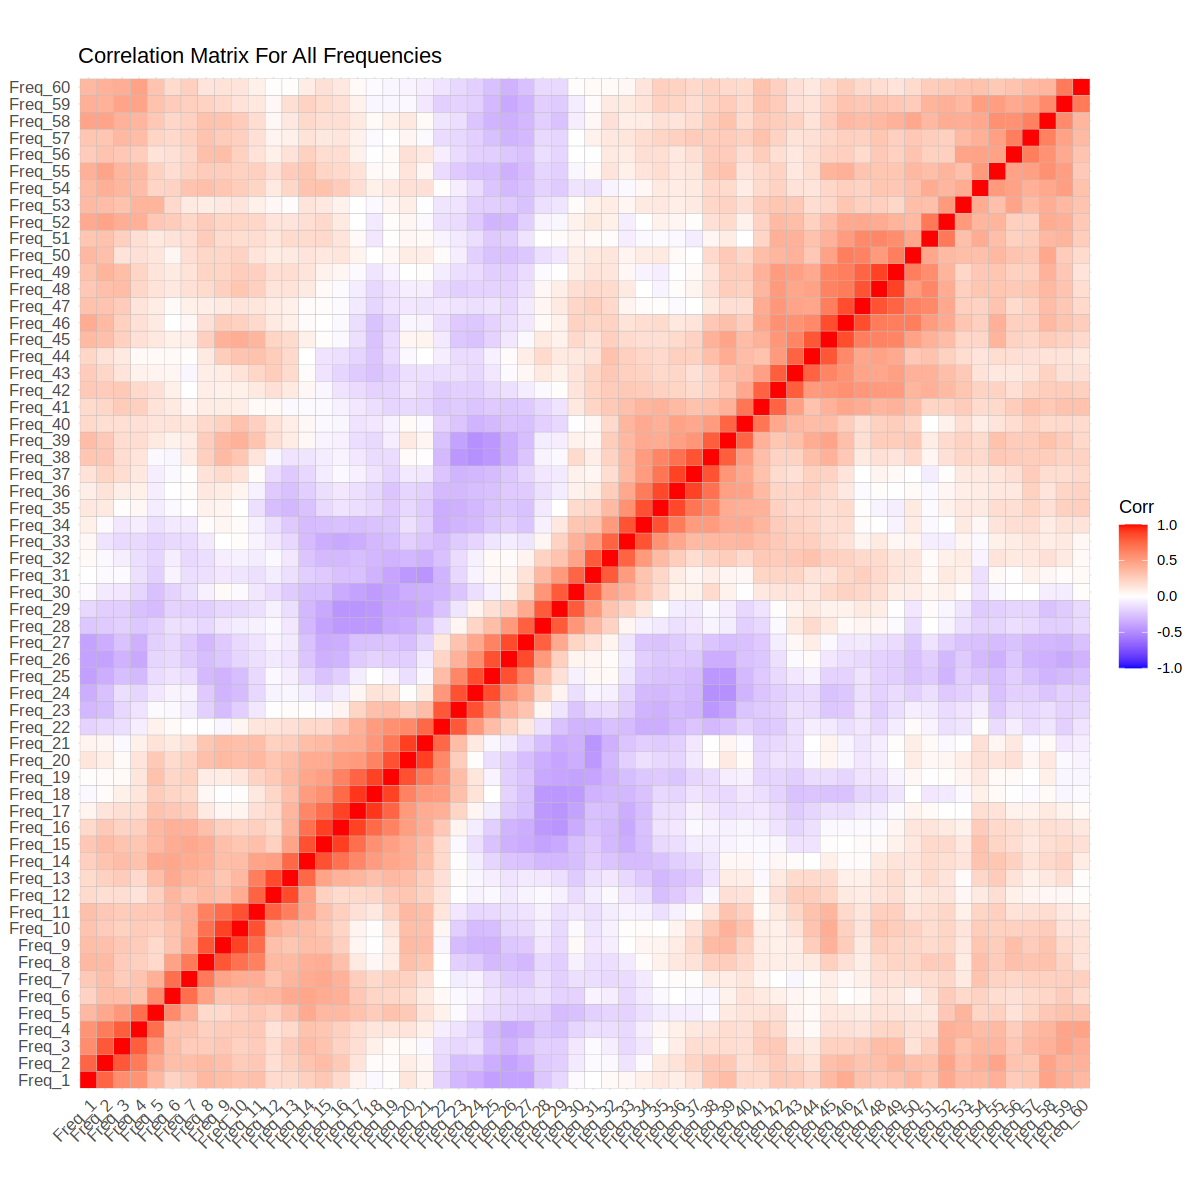

In [18]:
options(repr.plot.width = 10, repr.plot.height = 10)

sonar_corr_plot <- sonar_train |>
select(- Label)


ggcorrplot(cor(sonar_corr_plot)) + theme(axis.text.x=element_text(size=10)) + theme(axis.text.y=element_text(size=10)) + ggtitle("Correlation Matrix For All Frequencies")

Figure 2. Correlation Matrix for all 60 Frequencies

From our correlation matrix, we notice that not many frequencies are correlated with each other. Excluding frequencies correlated with themselves, the correlation ranges from around -0.5 to about 0.5 with many closer to 0 than the upper and lower bounds of the range. This visualization suggests that the frequencies are not very correlated indicating to us that a frequency value will most likely not influence another frequency value. Therefore, we should expect most frequencies to not affect other frequencies when we are looking at our results.

### Data Analysis

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.8517070,5,0.02819277,Preprocessor1_Model01
2,accuracy,binary,0.8517070,5,0.02819277,Preprocessor1_Model02
3,accuracy,binary,0.8635618,5,0.02542111,Preprocessor1_Model03
4,accuracy,binary,0.8635618,5,0.02542111,Preprocessor1_Model04
5,accuracy,binary,0.8194086,5,0.01928231,Preprocessor1_Model05


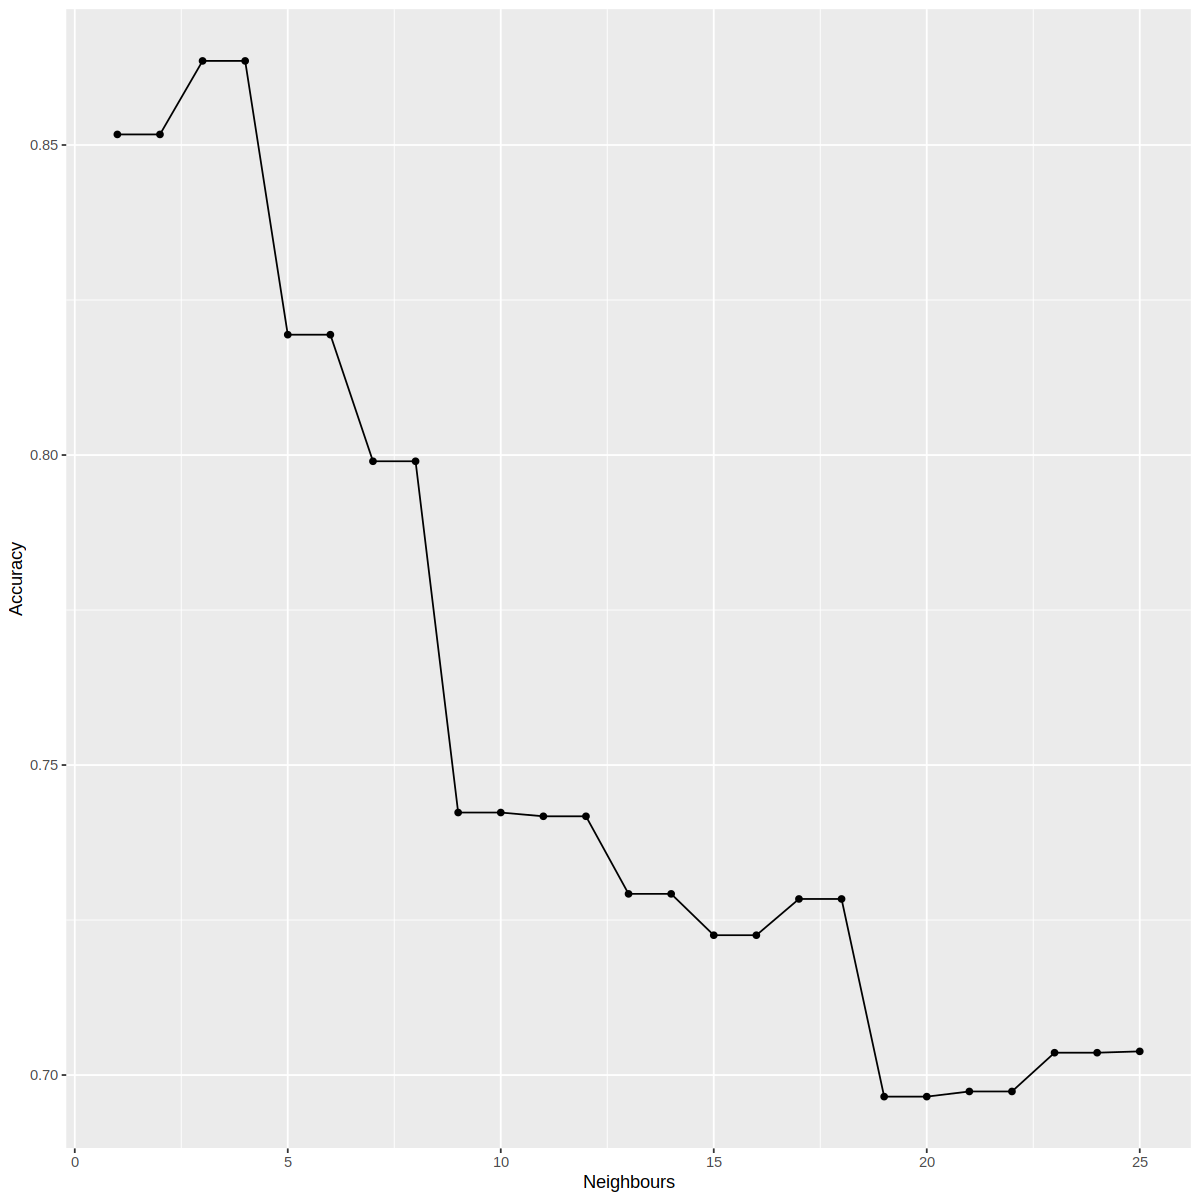

In [19]:
# We alreadly split our data into our training set and our testing set
# We also have already made our recipe

set.seed(3)

# Now we need to make a model specification with tune() as the neighbours 
# to find the best number of neighbours

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
set_engine("kknn") |>
set_mode("classification")

# Here we want to specify how many coss-validations we want

number_vfold <- vfold_cv(sonar_train, v = 5, strata = Label)

# This is the range of k values we are testing

k_vals <- tibble(neighbors = seq(from = 1, to = 25, by = 1))

# Now we are putting it all in a workflow

knn_fit <- workflow() |>
add_recipe(sonar_train_recipe) |>
add_model(knn_spec) |>
tune_grid(resamples = number_vfold, grid = k_vals) |>
collect_metrics()

accuracy <- knn_fit |>
filter(.metric == "accuracy")

# We make a plot to find the k with the highest accuracy

cross_val_plot <- ggplot(accuracy, aes(x = neighbors, y = mean)) + geom_point() + geom_line () + labs(x = "Neighbours", y = "Accuracy")

cross_val_plot

# We see that k is highest at 3 or 4 but we will use 3 as we have 2 labels
# which means we won't have even splits now.

head(accuracy, 5)

# The highest accuracy is 86.35618% to be exact

Figure 3. Cross Validation for K Neighbour Selection

In [20]:
set.seed(4)

# Now that we found k = 3, we create a new workflow

new_knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
set_engine("kknn") |>
set_mode("classification")

new_knn_fit <- workflow() |>
add_recipe(sonar_train_recipe) |>
add_model(new_knn_spec) |>
fit(data = sonar_train)

# Now we can test our testing set

sonar_test_predictions <- predict(new_knn_fit, sonar_test) |>
bind_cols(sonar_test)

head(sonar_test_predictions, 3)
tail(sonar_test_predictions, 3)

.pred_class,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,⋯,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Rock,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,⋯,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
Mine,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,⋯,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock
Rock,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,⋯,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,Rock


.pred_class,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,⋯,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Mine,0.0056,0.0267,0.0221,0.0561,0.0936,0.1146,0.0706,0.0996,0.1673,⋯,0.0072,0.0055,0.0074,0.0068,0.0084,0.0037,0.0024,0.0034,0.0007,Mine
Mine,0.0116,0.0744,0.0367,0.0225,0.0076,0.0545,0.1110,0.1069,0.1708,⋯,0.0141,0.0103,0.0100,0.0034,0.0026,0.0037,0.0044,0.0057,0.0035,Mine
Mine,0.0272,0.0378,0.0488,0.0848,0.1127,0.1103,0.1349,0.2337,0.3113,⋯,0.0091,0.0045,0.0043,0.0043,0.0098,0.0054,0.0051,0.0065,0.0103,Mine


In [21]:
set.seed(4)

# We get the confusion matrix for our testing set

sonar_metrics <- sonar_test_predictions |>
metrics(truth = Label, estimate = .pred_class) |>
filter(.metric == "accuracy")
sonar_metrics

sonar_conf_mat <- sonar_test_predictions |>
conf_mat(truth = Label, estimate = .pred_class)

sonar_conf_mat

# We see we have an accuracy of ~85% and that rocks are more likely 
# to be predicted mines than mines are predicted to be rocks.

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8490566


          Truth
Prediction Mine Rock
      Mine   27    7
      Rock    1   18

Table 7. Confusion Matrix for Testing Set

In [22]:
set.seed(4)

# We are finally able to test our unknown label to determine what it is

unknown_label <- tibble(
Freq_1=0.029293548, Freq_2=0.038125161, Freq_3=0.043919355, Freq_4=0.053570968, Freq_5=0.073985161,
Freq_6=0.107596129, Freq_7=0.123939355, Freq_8=0.135519355, Freq_9=0.182131613, Freq_10=0.210321290,
Freq_11=0.239072258, Freq_12=0.252205161, Freq_13=0.269441935, Freq_14=0.287030968, Freq_15=0.307488387,
Freq_16=0.368141935, Freq_17=0.409109677, Freq_18=0.442067097, Freq_19=0.493798710, Freq_20=0.567036774,
Freq_21=0.629974839, Freq_22=0.650916774, Freq_23=0.668149032, Freq_24=0.692389677, Freq_25=0.706011613,
Freq_26=0.731724516, Freq_27=0.728425806, Freq_28=0.714849677, Freq_29=0.656634839, Freq_30=0.586917419,
Freq_31=0.498092903, Freq_32=0.438041290, Freq_33=0.410323226, Freq_34=0.399729032, Freq_35=0.392028387,
Freq_36=0.383221290, Freq_37=0.355252903, Freq_38=0.328312258, Freq_39=0.315471613, Freq_40=0.297972903,
Freq_41=0.273301290, Freq_42=0.261722581, Freq_43=0.240483871, Freq_44=0.210916774, Freq_45=0.194581935,
Freq_46=0.158237419, Freq_47=0.118338065, Freq_48=0.088425806, Freq_49=0.050437419, Freq_50=0.020080645,
Freq_51=0.015726452, Freq_52=0.013165161, Freq_53=0.010220645, Freq_54=0.010878065, Freq_55=0.008923871,
Freq_56=0.007916774, Freq_57=0.007650323, Freq_58=0.007411613, Freq_59=0.007715484, Freq_60=0.006610968)

predict(new_knn_fit, unknown_label)

# Our classifier predicted our unknown label as a Mine

.pred_class
<fct>
Mine


### Visualizations of the Analysis

In [23]:
set.seed(5)

# To create our visualizations, we need to add the new label to our dataframe

new_row <- data.frame(
Freq_1=0.029293548, Freq_2=0.038125161, Freq_3=0.043919355, Freq_4=0.053570968, Freq_5=0.073985161,
Freq_6=0.107596129, Freq_7=0.123939355, Freq_8=0.135519355, Freq_9=0.182131613, Freq_10=0.210321290,
Freq_11=0.239072258, Freq_12=0.252205161, Freq_13=0.269441935, Freq_14=0.287030968, Freq_15=0.307488387,
Freq_16=0.368141935, Freq_17=0.409109677, Freq_18=0.442067097, Freq_19=0.493798710, Freq_20=0.567036774,
Freq_21=0.629974839, Freq_22=0.650916774, Freq_23=0.668149032, Freq_24=0.692389677, Freq_25=0.706011613,
Freq_26=0.731724516, Freq_27=0.728425806, Freq_28=0.714849677, Freq_29=0.656634839, Freq_30=0.586917419,
Freq_31=0.498092903, Freq_32=0.438041290, Freq_33=0.410323226, Freq_34=0.399729032, Freq_35=0.392028387,
Freq_36=0.383221290, Freq_37=0.355252903, Freq_38=0.328312258, Freq_39=0.315471613, Freq_40=0.297972903,
Freq_41=0.273301290, Freq_42=0.261722581, Freq_43=0.240483871, Freq_44=0.210916774, Freq_45=0.194581935,
Freq_46=0.158237419, Freq_47=0.118338065, Freq_48=0.088425806, Freq_49=0.050437419, Freq_50=0.020080645,
Freq_51=0.015726452, Freq_52=0.013165161, Freq_53=0.010220645, Freq_54=0.010878065, Freq_55=0.008923871,
Freq_56=0.007916774, Freq_57=0.007650323, Freq_58=0.007411613, Freq_59=0.007715484, Freq_60=0.006610968, Label="Mine")

new_sonar <- rbind(sonar_data, new_row)

In [24]:
options(repr.plot.width = 7, repr.plot.height = 7)

# Creating density plots to understand our unknown label better 

new_hist_18 <- ggplot(new_sonar, aes(x = Freq_18, fill = Label)) + 
          geom_density() + 
          geom_vline(xintercept = 0.442067097, linetype = "dashed") +
          labs(x = "Frequency 18", y = "Count", fill = "Label") +
          ggtitle("Density of Frequency 18 Labeled as Mine or Rock") +
          theme(text = element_text(size = 12)) +
          facet_grid(rows = vars(Label))

In [25]:
options(repr.plot.width = 7, repr.plot.height = 7)
new_hist_12 <- ggplot(new_sonar, aes(x = Freq_12, fill = Label)) + 
          geom_density() + 
          geom_vline(xintercept = 0.252205161, linetype = "dashed") +
          labs(x = "Frequency 12", y = "Count", fill = "Label") +
          ggtitle("Density of Frequency 12 Labeled as Mine or Rock") +
          theme(text = element_text(size = 12)) +
          facet_grid(rows = vars(Label))

In [26]:
options(repr.plot.width = 7, repr.plot.height = 7)
new_hist_21 <- ggplot(new_sonar, aes(x = Freq_21, fill = Label)) + 
          geom_density() + 
          geom_vline(xintercept = 0.629974839, linetype = "dashed") +
          labs(x = "Frequency 21", y = "Count", fill = "Label") +
          ggtitle("Density of Frequency 21 Labeled as Mine or Rock") +
          theme(text = element_text(size = 12)) +
          facet_grid(rows = vars(Label))

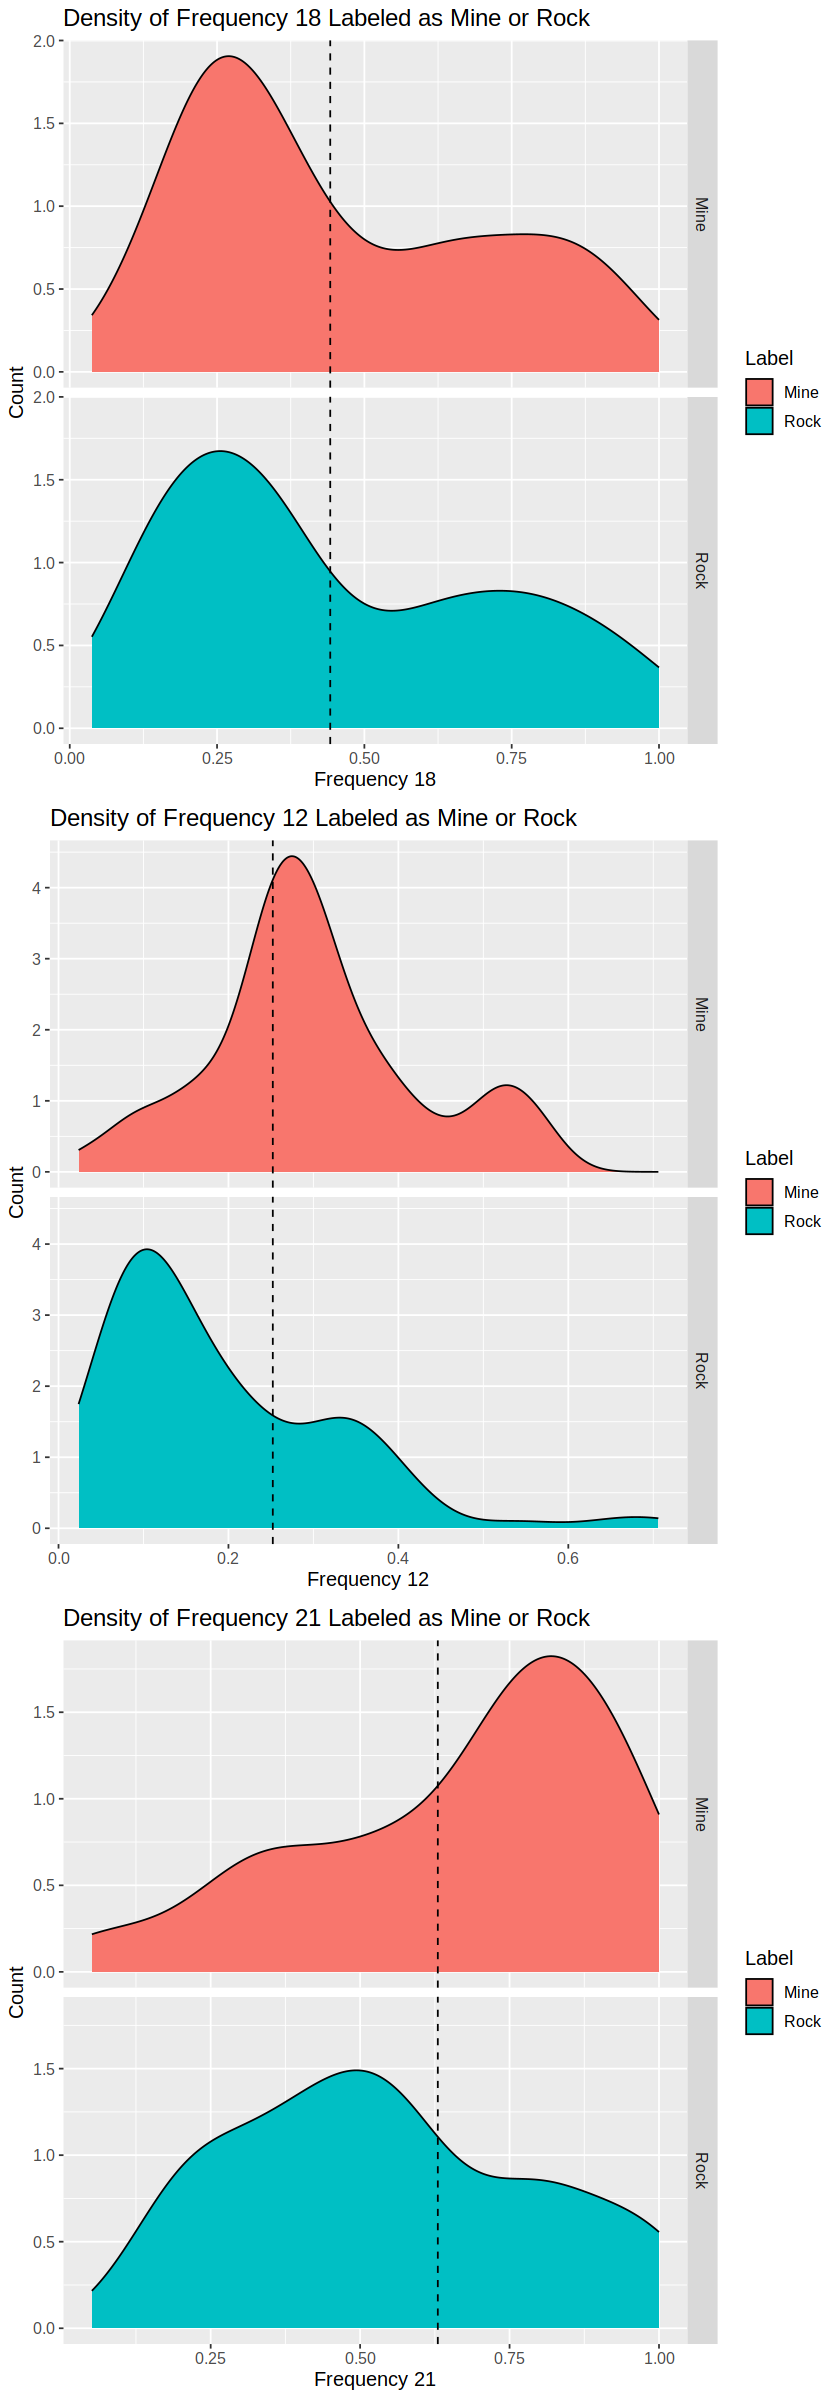

In [27]:
options(repr.plot.width = 7, repr.plot.height = 20)
plot_grid(new_hist_18, new_hist_12, new_hist_21, ncol = 1)

Figure 4. Density Plots of Frequencies 18, 12, 21 with the Unknown Label's Frequency as Vertical Line

Since frequency 18 is not a driving force, we do not expect our unknown frequency to be anywhere specific. Since frequency 12 is a big driving force, we expect our unknown frequency to be near the mean of our mine bell-shape curve. Frequency 21 is a smaller driving force, we would expect our unknown frequency to be anywhere from 0.65 to 1.0. 

## Discussion

We did a KNN classification for our sonar dataset to determine whether an unknown label was a rock or a mine. For our model, we chose k=3 because we determined it yielded the highest accuracy for our classification. Our cross validation plot had k=3 and k=4 yielding the same accuracy; however, we decided to use k=3 since we needed an odd number of neighbors as it is a binary classification problem. After running our unknown label through our classification model, we found that it was a mine.

Our findings were as expected. Through our exploratory data analysis, we determined a few driving forces for this dataset to help us make a strong hypothesis. After plotting a few histograms of frequencies against the count of rocks and mines, we were able to get good visualizations to find the possible driving forces for the classification of our unknown label. 

After plotting frequency 18 (Figure 1), we determined that this frequency was not a driving force as the histogram distributions for both the labels rock and mine were very similar. We would not expect our unknown label’s frequency 18 to be anywhere specific as this frequency does not play a role in determining the label. We found the unknown label to have a value of about 0.40 for frequency 18 which is as expected (Figure 4). Any value from 0 - 1 would have been expected. We determined that frequency 12 is a very big driving force (Figure 1). The mine and rock histograms are very different suggesting that we should expect our unknown label’s frequency 12 to be somewhere specific depending on its label. After determining our label is a mine, we would expect our label’s frequency 12 to be very close to the mode of the mine’s bell-shaped curve (Figure 4). This is exactly what we found (Figure 4). From Figure 4, we can see that our label’s frequency 12 is almost right on the mode of our mine density plot which is about 0.25. This is exactly what we would have been expecting. We determined that frequency 21 may also be a driving force, but it is not as big of a driving force as frequency 12 as we see the mine and rock histogram distributions overlap quite heavily (Figure 1). Therefore, we would expect our unknown label’s frequency 21 to be somewhat near the mode of the mine distribution. As seen in Figure 4, our label’s frequency 21 looks to be in between the mode of our mine and rock distributions. Since we said that this frequency is not a huge driving force, this result is not too unexpected. We would have liked to see our label’s frequency be a little closer to our mine’s mode. Nonetheless, we are not very surprised at where our label’s frequency 21 lies at as this frequency is not a very big driving factor in determining if an object is a mine or a rock. 


The findings from the analysis can have several implications and impacts. Understanding the key features that drive the classification can provide insights into the inner workings of the model. In this case, recognizing the importance of certain frequencies helps in interpreting how the model makes decisions. For instance, our frequency 12 can be considered an important factor for distinguishing between rocks and mines. This information is valuable for feature selection in future analyses or for building more efficient models (Sonar Data — Mines vs Rocks — on CAInvas, 2020). The insights gained from the analysis also contribute to domain knowledge. Understanding which frequencies are crucial for classification enhances domain experts' understanding of the physical characteristics that differentiate rocks from mines in sonar data (Sonar Data — Mines vs Rocks — on CAInvas, 2020). The findings can also guide further model refinement. For example, if certain features are found to be less informative, they might be excluded or given less weight in future iterations of the model. Additionally, insights gained from the analysis may apply to similar datasets or problems and understanding the importance of certain features could aid in the development of models for related tasks. Overall, the impact of these findings extends beyond model accuracy to include improved interpretability and better domain knowledge (Sonar Data — Mines vs Rocks — on CAInvas, 2020). These insights can inform future iterations of the model and contribute to the broader field of sonar data analysis.

The findings from the analysis provide new possibilities for exploration and they also raise questions. How well do the identified driving forces generalize to other sonar datasets or similar classification problems? Are the same frequencies critical across different contexts, or do specific datasets exhibit unique characteristics? Can additional derived features or transformations of existing features improve the model's performance? To illustrate, are there interactions between frequencies or other features that are not immediately apparent but could enhance predictive power? These questions offer a future path for improving the model and expanding the analysis to take advantage of larger opportunities and challenges in the classification of sonar data.

## References

Sejnowski, T., & Gorman, R. (n.d.). Connectionist Bench (Sonar, Mines vs. Rocks).

    https://doi.org/10.24432/C5T01Q
    
    
Sonar data — Mines vs Rocks — on cAInvas. (2020). AITS Journal; Medium. 

    https://medium.com/ai-techsystems/sonar-data-mines-vs-rocks-on-cainvas-c0a08dde895b